[Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import os
import glob

%matplotlib inline

### I am reading twelve csv's in the current directory from where I initiated the jupyter notebook.

Files: 
------

```
[~/Desktop/udacity/proj5]$ ls -lrt *csv
    39120422  9 Jan  2020 201908-baywheels-tripdata.csv
    40479431  9 Jan  2020 201909-baywheels-tripdata.csv
    44675257  9 Jan  2020 201910-baywheels-tripdata.csv
    34669388  9 Jan  2020 201911-baywheels-tripdata.csv
    26289897 24 Mar 19:55 201912-baywheels-tripdata.csv
    45417326 24 Mar 19:57 202001-baywheels-tripdata.csv
    63329055 24 Mar 18:59 202002-baywheels-tripdata.csv
    28323826 18 Apr 00:48 202003-baywheels-tripdata.csv
    12772882 22 May 16:50 202004-baywheels-tripdata.csv
    21784055  5 Jun 16:50 202005-baywheels-tripdata.csv
    25802599  6 Jul 00:54 202006-baywheels-tripdata.csv
    25761710 12 Aug 02:50 202007-baywheels-tripdata.csv
```
        
I am exploring last twelve month's of data collected from [baywheels](https://s3.amazonaws.com/baywheels-data/index.html) as seen above the data is available in CSV format from the [baywheels](https://s3.amazonaws.com/baywheels-data/index.html).  

From the [baywheels](https://www.lyft.com/bikes/bay-wheels/system-data) I know what each column of data represents:
```

System Data
Here you'll find Bay Wheels's trip data for public use. So whether you're a designer, developer or just plain curious, feel free to download it and bring it to life. This data is provided according to the Bay Wheels License Agreement.

The Data
Each trip is anonymized and includes:

Trip Duration (seconds)
Start Time and Date
End Time and Date
Start Station ID
Start Station Name
Start Station Latitude
Start Station Longitude
End Station ID
End Station Name
End Station Latitude
End Station Longitude
Bike ID
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
```

In [2]:
# verify the list of all the files that we are reading
all_csvs = [file for file in glob.glob(os.path.join('.', '*.csv'))]
all_csvs

['./201909-baywheels-tripdata.csv',
 './201908-baywheels-tripdata.csv',
 './202006-baywheels-tripdata.csv',
 './202001-baywheels-tripdata.csv',
 './201910-baywheels-tripdata.csv',
 './202002-baywheels-tripdata.csv',
 './202005-baywheels-tripdata.csv',
 './202004-baywheels-tripdata.csv',
 './202003-baywheels-tripdata.csv',
 './201912-baywheels-tripdata.csv',
 './201911-baywheels-tripdata.csv',
 './202007-baywheels-tripdata.csv']

In [3]:
frames = [pd.read_csv(file) for file in glob.glob(os.path.join('.', '*.csv'))]
df = pd.concat(frames, ignore_index=True)
print(f'Number of columns in the combined dataframe: {df.shape[0]}')
print(f'Number of rows in the combined dataframe: {df.shape[1]}')

/Users/simer.anand/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/simer.anand/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Number of columns in the combined dataframe: 2444694
Number of rows in the combined dataframe: 25


#### Gathering and Assessing
    - View the sample of the dataframe.
    - Check the column names
    - run info() on the dataframe to check datatype.

In [4]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,rental_access_method,is_equity
1701026,NaN,NaN,NaN,38.0,The Embarcadero at Pier 38,NaN,NaN,NaN,NaN,NaN,...,electric_bike,2020-04-28 17:02:28,2020-04-28 17:12:25,37.783100,-122.388000,37.785000,-122.404600,casual,NaN,NaN
1073877,139.0,2019-10-07 09:57:52.0010,2019-10-07 10:00:11.8990,132.0,24th St at Chattanooga St,37.751819,-122.426614,386.0,24th St at Bartlett St,37.752105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040564,557.0,2019-10-11 07:28:25.4700,2019-10-11 07:37:42.4780,13.0,Commercial St at Montgomery St,37.794231,-122.402923,28.0,The Embarcadero at Bryant St,37.787168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504014,NaN,NaN,NaN,119.0,18th St at Noe St,NaN,NaN,84.0,Duboce Park,NaN,...,docked_bike,2020-06-19 14:42:46,2020-06-19 14:54:14,37.761047,-122.432641,37.769201,-122.433812,casual,NaN,NaN
2145596,1083.0,2019-11-21 07:14:55.6340,2019-11-21 07:32:58.8780,441.0,Chestnut St at Van Ness Ave,37.802288,-122.424509,16.0,Steuart St at Market St,37.794130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533492,NaN,NaN,NaN,172.0,College Ave at Taft Ave,NaN,NaN,172.0,College Ave at Taft Ave,NaN,...,docked_bike,2020-06-20 20:13:45,2020-06-20 20:37:31,37.841799,-122.251534,37.841800,-122.251535,casual,NaN,NaN
1554453,1161.0,2020-02-05 15:33:03,2020-02-05 15:52:25,NaN,NaN,37.808473,-122.412574,NaN,NaN,37.796113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,app,NaN
1118178,210.0,2019-10-01 13:51:06.8140,2019-10-01 13:54:37.1360,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,245.0,Downtown Berkeley BART,37.870139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1191688,1182.0,2020-02-13 08:08:57.4310,2020-02-13 08:28:40.4190,106.0,Sanchez St at 17th St,37.763242,-122.430675,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1731005,NaN,NaN,NaN,450.0,Funston Ave at Irving St,NaN,NaN,450.0,Funston Ave at Irving St,NaN,...,docked_bike,2020-04-10 14:47:13,2020-04-10 16:33:25,37.763900,-122.470700,37.763900,-122.470700,casual,NaN,NaN


### Observations:
- There is a problem in the dataset above, columns `started_at` and `start_time` has same information,
- There is a problem in the dataset above, columns `ended_at` and `end_time` has same information
- In the last twelve months of the data I believe different columns names were used to represent the same data.
- We need to correct this, will fix this in the `Cleaning` section.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444694 entries, 0 to 2444693
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  ride_id                  object 
 15  rideable_type            object 
 16  started_at               object 
 17  ended_at                 object 
 18  start_lat                float64
 19  start_lng                float64
 20  end_lat                  float64
 21  end_lng 

#### Create a copy of the dataframe before I assess and make changes to the dataframe.
- I name the new dataframe as `ford_df`.

In [6]:
ford_df = df.copy()

#### Assessment of the dataframe `ford_df`:
- Check for the null entries and their count in the dataframe.
- Check for any duplicates in the dataframe and their count.
- Assess the different columns and their values using methods `unique(), info(), describe(), value_counts()`.

In [7]:
# check for any null rows count for each column.
ford_df.isnull().sum()

duration_sec                535645
start_time                  535645
end_time                    535645
start_station_id            701331
start_station_name          700093
start_station_latitude      535645
start_station_longitude     535645
end_station_id              709551
end_station_name            708275
end_station_latitude        535645
end_station_longitude       535645
bike_id                     535645
user_type                   535645
bike_share_for_all_trip    1592164
ride_id                    1909049
rideable_type              1909049
started_at                 1909049
ended_at                   1909049
start_lat                  1909049
start_lng                  1909049
end_lat                    1909887
end_lng                    1909887
member_casual              1909049
rental_access_method       1797745
is_equity                  2306443
dtype: int64

In [8]:
#check the number of duplicate rows
number_of_duplicate_rows = ford_df.duplicated().sum()
print(f'Number of duplicate rows: {number_of_duplicate_rows}')

# We will clean the duplicate rows in the next section of cleaning dataframe.

Number of duplicate rows: 7512


In [9]:
# Curious to know the most common bike type being used
ford_df.rideable_type.value_counts()

electric_bike    367168
docked_bike      168477
Name: rideable_type, dtype: int64

In [10]:
# Check to see if the data has any duplicate bike id
ford_df.ride_id.value_counts().nlargest(10).sort_values()

83A207FAD76F08B0    1
ACBC1192CF54A276    1
11799F7D34B194D8    1
2A8A92B3EB84CD52    1
C9FE6CA77F732657    1
D62320C0F6238369    1
87E3A1B7E9AA31E4    1
290F77C6B31DEAE2    1
6CC76C6A0B40682F    1
D72ED42F03AE4134    1
Name: ride_id, dtype: int64

In [11]:
# Not sure what this column `is_equity` means, curious to check the values 
ford_df.is_equity.value_counts()

False    129548
True       8703
Name: is_equity, dtype: int64

In [12]:
# Find out the different number of user type casual vs member
ford_df.member_casual.value_counts()

casual    319097
member    216548
Name: member_casual, dtype: int64

In [13]:
# Find out the different number of user type subscriber vs customer
# looks like some data error, the two columns `user_type` and `member_casual` 
# are representing the same values but different terminology
ford_df.user_type.value_counts()

Subscriber    1282009
Customer       627040
Name: user_type, dtype: int64

In [14]:
# Find out the number of users in the app vs clipper
ford_df.rental_access_method.value_counts()

app        595649
clipper     51300
Name: rental_access_method, dtype: int64

#### Cleaning Data:
- delete some of the columns which wont be required for the analysis
  such as:
   `start_station_latitude`, 
   `start_station_longitude`, 
   `end_station_latitude`, 
   `end_station_longitude`,
   `start_lat`,
   `start_lng`,
   `end_lat`,
   `end_lng`,
- `started_at`: the column values are in str format should be datetime obj,
- `ended_at`: the column values are in str format should be datetime obj,
- duplicated_rows: get rid of the duplicated rows,
- `started_at` and `start_time` two columns has the same value,
- `ended_at` and `end_time` two columns has the same value,
- create new columns which contains the `year`, `month` and `day` when the bike was hired.
- columns `member_casual` and `user_type` represents the same value, merge the values and replace one of the values with the other, for example as seen `user_type` has `Subscriber` and `Customer` values and `member_casual` has values `casual` and `member` values. They are all same. Hence for our dataframe we will user `Subscriber` and `Customer` values.
- `duration_sec`: column value is in seconds, will convert them in mins to have smaller values and rename the column from `duration_sec` to `duraion_mins`.

In [15]:
# Drop the columns `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`, start_lat, start_lng, end_lat, end_lng
ford_df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'is_equity'], inplace=True)

In [16]:
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip,ride_id,rideable_type,started_at,ended_at,member_casual,rental_access_method
0,60863.0,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,465.0,12904.0,Customer,No,NaN,NaN,NaN,NaN,NaN,NaN
1,36019.0,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,443.0,163.0,Customer,No,NaN,NaN,NaN,NaN,NaN,NaN
2,5615.0,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,4.0,10737.0,Customer,No,NaN,NaN,NaN,NaN,NaN,NaN
3,1482.0,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,460.0,10346.0,Customer,No,NaN,NaN,NaN,NaN,NaN,NaN
4,1272.0,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,127.0,1349.0,Subscriber,No,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ford_df.bike_share_for_all_trip.value_counts()

No     788939
Yes     63591
Name: bike_share_for_all_trip, dtype: int64

In [18]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444694 entries, 0 to 2444693
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   end_station_id           float64
 5   bike_id                  float64
 6   user_type                object 
 7   bike_share_for_all_trip  object 
 8   ride_id                  object 
 9   rideable_type            object 
 10  started_at               object 
 11  ended_at                 object 
 12  member_casual            object 
 13  rental_access_method     object 
dtypes: float64(4), object(10)
memory usage: 261.1+ MB


In [19]:
# Convert the time related columns in the dataframe into the datetime obj
ford_df['start_time'] = pd.to_datetime(ford_df['start_time'])
ford_df['end_time'] = pd.to_datetime(ford_df['end_time'])
ford_df['started_at'] = pd.to_datetime(ford_df['started_at'])
ford_df['ended_at'] = pd.to_datetime(ford_df['ended_at'])

In [20]:
# dtype for datetime64[ns] object if reffered as '<M8[ns]'
# If below two statements do not return False, 
# that means the objects have been converted to the datetime obj

assert ford_df.start_time.dtype == '<M8[ns]'
assert ford_df.end_time.dtype == '<M8[ns]'

In [21]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444694 entries, 0 to 2444693
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   end_station_id           float64       
 5   bike_id                  float64       
 6   user_type                object        
 7   bike_share_for_all_trip  object        
 8   ride_id                  object        
 9   rideable_type            object        
 10  started_at               datetime64[ns]
 11  ended_at                 datetime64[ns]
 12  member_casual            object        
 13  rental_access_method     object        
dtypes: datetime64[ns](4), float64(4), object(6)
memory usage: 261.1+ MB


- now coming to the duplicate row of the data

In [22]:
# check out the redudant rows and what their data look like
# I will create a new subset of dataframe with only the duplicated rows.
duplicate_ford_df_rows = ford_df[ford_df.duplicated()]
duplicate_ford_df_rows.sample(10)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip,ride_id,rideable_type,started_at,ended_at,member_casual,rental_access_method
1909590,573.0,2020-03-01 07:08:14,2020-03-01 07:17:48,NaN,84.0,695150.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,clipper
1864396,1255.0,2020-03-01 09:23:41,2020-03-01 09:44:37,NaN,NaN,308232.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1851191,458.0,2020-03-01 21:20:29,2020-03-01 21:28:08,NaN,NaN,404592.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,clipper
1853554,2531.0,2020-03-01 15:53:41,2020-03-01 16:35:52,NaN,NaN,237074.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1909514,888.0,2020-03-01 17:38:40,2020-03-01 17:53:28,NaN,NaN,399199.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1919508,1329.0,2020-03-01 03:05:52,2020-03-01 03:28:02,NaN,NaN,580899.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1928608,1219.0,2020-03-01 13:39:57,2020-03-01 14:00:16,NaN,NaN,927579.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1925866,750.0,2020-03-01 09:16:42,2020-03-01 09:29:12,NaN,NaN,834764.0,Customer,NaN,NaN,NaN,NaT,NaT,NaN,app
1861137,524.0,2020-03-01 17:44:37,2020-03-01 17:53:21,141.0,411.0,430940.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1895011,1591.0,2020-03-01 09:50:13,2020-03-01 10:16:45,485.0,NaN,906629.0,Customer,NaN,NaN,NaN,NaT,NaT,NaN,app


From the visual assessment of the duplicated rows, It does not look like the rows are duplicate, assuming its the same bike id and all other columns with mostly `NaN` values and float values (only decimal differences) with only decimal differences.

In [23]:
# check the number of entries for each bike or see if my above assumption is true
duplicate_ford_df_rows.bike_id.value_counts().nlargest(10)

264291.0    24
370904.0    23
591582.0    22
394880.0    21
867712.0    20
478196.0    19
499847.0    19
119364.0    18
429980.0    18
462751.0    18
Name: bike_id, dtype: int64

- We see from above the bike id have multiple rows which makes sense bike id is associated with the bike and more than one user can use the bike.
- Lets see the details of the one of the bike from the duplicate rows dataframe.

In [24]:
duplicate_ford_df_rows.query('bike_id == 264291.0').describe()

,duration_sec,start_station_id,end_station_id,bike_id
count,24.000000,0.0,0.0,24.0
mean,602.083333,NaN,NaN,264291.0
std,316.112242,NaN,NaN,0.0
min,139.000000,NaN,NaN,264291.0
25%,345.000000,NaN,NaN,264291.0
50%,599.500000,NaN,NaN,264291.0
75%,818.250000,NaN,NaN,264291.0
max,1392.000000,NaN,NaN,264291.0


In [25]:
duplicate_ford_df_rows.query('bike_id == 264291.0').sample(5)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip,ride_id,rideable_type,started_at,ended_at,member_casual,rental_access_method
1907480,315.0,2020-03-01 15:42:40,2020-03-01 15:47:56,NaN,NaN,264291.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1884893,446.0,2020-03-01 16:04:54,2020-03-01 16:12:20,NaN,NaN,264291.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1912576,819.0,2020-03-01 15:49:26,2020-03-01 16:03:06,NaN,NaN,264291.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1883892,353.0,2020-03-01 11:34:58,2020-03-01 11:40:52,NaN,NaN,264291.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1875668,559.0,2020-03-01 14:50:27,2020-03-01 14:59:47,NaN,NaN,264291.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app


- All the values in the `duration_sec` are different, hence I conclude there are no redudant / duplicate rows in the `duplicate_ford_df_rows` which is the subset of `duplicated` rows from dataframe `ford_df`.

#### Fixing the two columns with same data `started_at` and `start_time`
- update the column `start_time` with all the values in column `started_at` 
- delete the column `started_at`
- update the column `end_time` with all the values in column `ended_at` 
- delete the column `ended_at`

In [26]:
ford_df['start_time'] = ford_df['start_time'].combine_first(ford_df['started_at'])
ford_df['end_time'] = ford_df['end_time'].combine_first(ford_df['ended_at'])

In [27]:
ford_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip,ride_id,rideable_type,started_at,ended_at,member_casual,rental_access_method
450715,NaN,2020-06-26 09:43:32.000,2020-06-26 10:00:37.000,457.0,NaN,NaN,NaN,NaN,AA437A85FE53DA7D,electric_bike,2020-06-26 09:43:32,2020-06-26 10:00:37,casual,NaN
2322505,NaN,2020-07-05 14:09:33.000,2020-07-05 14:38:43.000,NaN,NaN,NaN,NaN,NaN,5BC18253D90766F7,electric_bike,2020-07-05 14:09:33,2020-07-05 14:38:43,casual,NaN
880769,992.0,2020-01-16 16:48:08.000,2020-01-16 17:04:41.000,NaN,6.0,889955.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
2410762,NaN,2020-07-06 19:01:23.000,2020-07-06 19:10:35.000,177.0,175.0,NaN,NaN,NaN,F87AB31B605EAEEE,docked_bike,2020-07-06 19:01:23,2020-07-06 19:10:35,casual,NaN
2153524,635.0,2019-11-20 08:11:25.598,2019-11-20 08:22:01.085,43.0,101.0,244.0,Subscriber,No,NaN,NaN,NaT,NaT,NaN,NaN
1406462,594.0,2020-02-05 08:41:12.000,2020-02-05 08:51:06.000,NaN,NaN,539344.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1452048,1212.0,2020-02-26 07:58:28.000,2020-02-26 08:18:40.000,NaN,NaN,474181.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,app
1148389,450.0,2020-02-24 18:42:38.679,2020-02-24 18:50:08.884,23.0,21.0,1886.0,Customer,NaN,NaN,NaN,NaT,NaT,NaN,NaN
542179,NaN,2020-06-15 21:02:28.000,2020-06-15 21:19:44.000,91.0,370.0,NaN,NaN,NaN,D134A89AA9A96A1E,docked_bike,2020-06-15 21:02:28,2020-06-15 21:19:44,casual,NaN
1281200,321.0,2020-02-09 07:21:13.000,2020-02-09 07:26:35.000,NaN,144.0,256089.0,Subscriber,NaN,NaN,NaN,NaT,NaT,NaN,clipper


- Now we create the columns to contain the `year`, `month` and `day` values when the bike was hired.

In [28]:
ford_df['year'] = ford_df['start_time'].dt.strftime('%Y')
ford_df['month'] = ford_df['start_time'].dt.strftime('%m')
ford_df['day'] = ford_df['start_time'].dt.strftime('%d')
ford_df['month_year'] = ford_df['start_time'].dt.strftime('%Y-%m')
ford_df['hour'] = ford_df['start_time'].dt.strftime('%H')

- Now we have five formats of date representation into the dataframe, why not just one more column with the day of the week when the bike was hired. 

In [29]:
ford_df['day_of_week'] = ford_df['start_time'].dt.strftime('%a')

In [30]:
# Drop the columns `started_at` and `ended_at`
ford_df.drop(columns=['started_at', 'ended_at'], inplace=True)

In [31]:
ford_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip,ride_id,rideable_type,member_casual,rental_access_method,year,month,day,month_year,hour,day_of_week
1670052,NaN,2020-05-29 07:44:05.000,2020-05-29 08:02:42.000,NaN,NaN,NaN,NaN,NaN,C4F171DFDFE3C298,electric_bike,casual,NaN,2020,05,29,2020-05,07,Fri
1210006,689.0,2020-02-08 17:03:22.651,2020-02-08 17:14:52.428,41.0,446.0,2669.0,Subscriber,NaN,NaN,NaN,NaN,NaN,2020,02,08,2020-02,17,Sat
1572458,NaN,2020-05-19 13:41:50.000,2020-05-19 13:52:59.000,NaN,122.0,NaN,NaN,NaN,DC179102C6B3FB57,electric_bike,member,NaN,2020,05,19,2020-05,13,Tue
1134618,976.0,2020-02-27 08:43:39.145,2020-02-27 08:59:55.856,189.0,239.0,11447.0,Subscriber,NaN,NaN,NaN,NaN,NaN,2020,02,27,2020-02,08,Thu
506083,NaN,2020-06-13 17:56:47.000,2020-06-13 18:02:16.000,NaN,NaN,NaN,NaN,NaN,B5EE1F24C73C972F,electric_bike,member,NaN,2020,06,13,2020-06,17,Sat
454175,NaN,2020-06-22 14:02:05.000,2020-06-22 14:28:25.000,NaN,440.0,NaN,NaN,NaN,D374A544B25B9324,electric_bike,casual,NaN,2020,06,22,2020-06,14,Mon
439143,NaN,2020-06-11 08:45:39.000,2020-06-11 09:01:16.000,NaN,NaN,NaN,NaN,NaN,D99D72FC65789E9A,electric_bike,casual,NaN,2020,06,11,2020-06,08,Thu
549028,NaN,2020-06-21 12:50:11.000,2020-06-21 12:50:41.000,511.0,511.0,NaN,NaN,NaN,16597B3A4E31D8F6,docked_bike,member,NaN,2020,06,21,2020-06,12,Sun
40053,1265.0,2019-09-25 11:38:01.455,2019-09-25 11:59:07.343,23.0,104.0,1901.0,Customer,No,NaN,NaN,NaN,NaN,2019,09,25,2019-09,11,Wed
2251038,238.0,2019-11-06 09:24:59.849,2019-11-06 09:28:58.133,196.0,337.0,9812.0,Subscriber,No,NaN,NaN,NaN,NaN,2019,11,06,2019-11,09,Wed


**Verified** : The values for each of above column looks correct.

#### Fixing the redudant columns `user_type` and `member_causal`
- replace the `member` with `Subscriber` string
- replace the `casual` with `Customer` string
- merge the two columns into one.

In [32]:
ford_df['member_casual'] = ford_df['member_casual'].replace('member', 'Subscriber')
ford_df['member_casual'] = ford_df['member_casual'].replace('casual', 'Customer')

- Now that we have replaced the strings in the column `member_casual`, next we merge it to the `user_type` column.

In [33]:
# Listing the number of the values before we merged so that we verfiy the Summation later
ford_df['member_casual'].value_counts()

Customer      319097
Subscriber    216548
Name: member_casual, dtype: int64

In [34]:
# Listing the number of the values before we merged so that we verfiy the Summation later
ford_df['user_type'].value_counts()

Subscriber    1282009
Customer       627040
Name: user_type, dtype: int64

In [35]:
# Merge the two columns
ford_df['user_type'] = ford_df['user_type'].combine_first(ford_df['member_casual'])

In [36]:
# Verify the total number of the Subcriber and Customer values are total of values from both the columns.
ford_df['user_type'].value_counts()

Subscriber    1498557
Customer       946137
Name: user_type, dtype: int64

In [37]:
# Verify that the columns have been merged.
ford_df[['user_type', 'member_casual']].sample(10)

,user_type,member_casual
1116976,Subscriber,NaN
1831998,Customer,NaN
1442775,Subscriber,NaN
2039117,Subscriber,NaN
687721,Subscriber,NaN
2135702,Customer,NaN
2049055,Subscriber,NaN
1659310,Customer,Customer
31704,Subscriber,NaN
2225596,Subscriber,NaN


In [38]:
# Drop the `member_casual` column as it is not required now, all the strings 
# in it is merged with the other column `user_type`.
ford_df.drop(columns=['member_casual'], inplace=True)

#### `duration_sec` column values are in the seconds, will change them in to the mins
- Also change the name of the header from `duration_sec` to `duration_mins`.

In [39]:
ford_df['duration_sec'] = ford_df['duration_sec'].div(60)

In [40]:
# since we have converted the duration_seconds from seconds to minute 
# it would be better if we change the header name as well 
ford_df.rename(columns={'duration_sec': 'duration_mins'}, inplace=True)

#### Save the dataframe into a master file.
   - saving the dataframe into the file name `fordbike_master.csv`

In [41]:
ford_df.to_csv('fordbike_master.csv', index=False)

### Structure of the data?
- 12 months of data from ford sharing bike app.
- the data has all the columns as mentioned.
- added columns `date`, `month` and `year` that contains the values when the bike was hired.
- changed the `start_time` and `end_time` to the date object


#### What is/are the main feature(s) of interest in your dataset?
I' m interest to see what are the days/hours/months when riders use the bike more and what type of users ride longer? What are the ways they access the shared bike. I am also interested in looking into the data from the COVID-19 point of view, look at the data to see how the COVID-19 impacted the Bay Wheel in terms of their ridership among different tupes of the users.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
So, I have created new columns: <br/> 
`year` - contains the year, for example, 2019, 2020,<br/>
`day_of_week` - contains the day, for example, 'Mon', Tues' <br/>
`month_year` - contains the values of year and month combined, for example, '2019_12', 2020_01', <br/>
`hour` - contains the hour when the bike was hired, for example, '01', '02', <br/>

I am going to use the above created columns of data with other columns already in the dataset such as: <br/>
`user_type` - tells me what type of user hired the bike `Subscriber` or casual `Customer`,
`duration_mins` - duration of the ride in mins,
`rideable_type` - type of bike `electric` or `docked`,
`rental_access_method` - method used to hire the bike `clipper` or `App`.

I will use above all columns to visualise the riders and their preference way of accessing bike, their preference of riding duration, and ride type. Again would keep in mind to assess the impact COVID-19 on all of these visualisation. 

### Univariate Visualisation:

#### 1. Number of Bike Hires or Rides on monthly basis.
> Interested to see what are the months when the riders hire the most and what is the trend and are the number of the riders increasing or decreasing. What is the impact of COVID-19 on ridership?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

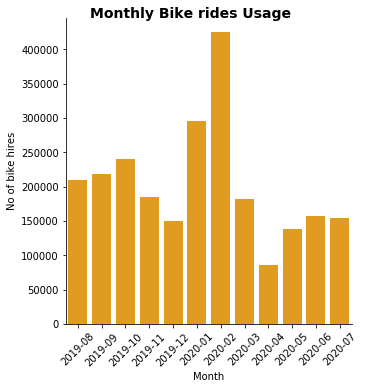

In [42]:
graph = sb.catplot(data=ford_df.sort_values(by='month_year'), x='month_year', kind='count', color='orange')
graph.set_axis_labels("Month", "No of bike hires")
graph.fig.suptitle('Monthly Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 45)

### Observation (Covid-19 Impact):
- Covid-19 did impact the bike hires, look at the stat from `March` and then `April` (its all time low in 12 months of data)

#### Lets narrow down to just the year `2020` and see how the trend looks like?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

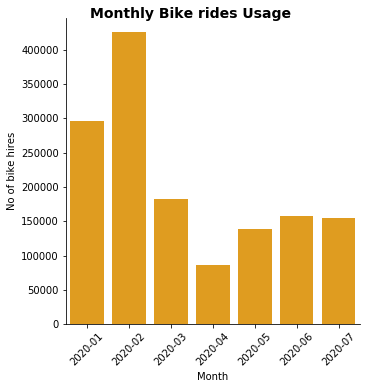

In [43]:
graph = sb.catplot(data=ford_df.query('month_year > "2019-12"').sort_values(by='month_year'), x='month_year', kind='count', color='orange')
graph.set_axis_labels("Month", "No of bike hires")
graph.fig.suptitle('Monthly Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 45)


### Observation 
- We can see above the months `Jan` and `Feb` had upward trend and suddenly the number of rides drop in the month of `March` and further dips in `April` and gradually picking up from there on.

#### 2. Number of Bike Hires or Rides on weekly basis.
> Interested in looking at the data to see if there is a popular day in the week when the riders are using the bike and what is the trend through out the week?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

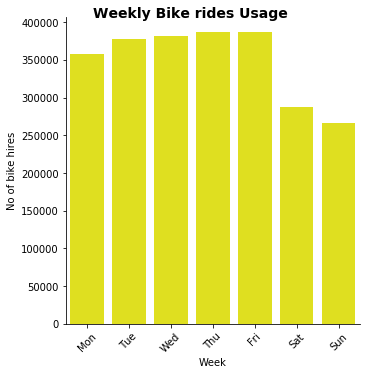

In [44]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=ford_df, x='day_of_week', kind='count', color='yellow', order=weekday)
graph.set_axis_labels("Week", "No of bike hires")
graph.fig.suptitle('Weekly Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 45)

### Observation :
- Weekdays are generally more busy than the weekends.
- Trend of ridership is upwards throughout the weekdays.
- `Friday` is 15-20% busier than `Sunday`

#### 3. Number of Bike Hires or Rides on date basis.
> Interested to see if there is a popular day in the month when the riders hire the bike the most. And what it the trend look like in a month of ridership?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

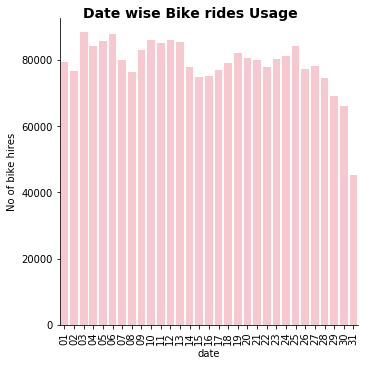

In [45]:
graph = sb.catplot(data=ford_df, x='day', kind='count', color='pink')
graph.set_axis_labels("date", "No of bike hires")
graph.fig.suptitle('Date wise Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90)

### Observation :
- Did not find anything interesting,
- 31st date is bound to have less hire count since the date only comes in 6/12 months.

#### 4. Number of Bike Hires or Rides on hourly basis.
> Interested to see what are the popular times of the day when the riders hire the most. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

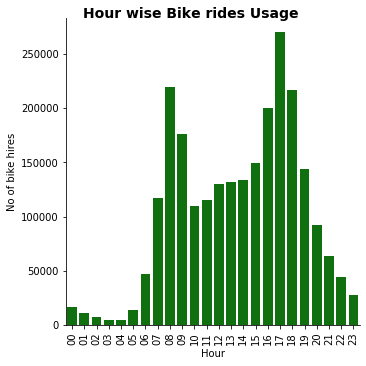

In [46]:
graph = sb.catplot(data=ford_df, x='hour', kind='count', color='green')
graph.set_axis_labels("Hour", "No of bike hires")
graph.fig.suptitle('Hour wise Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90)

### Observation :
- Peak hire is around the start and end of the business hour.

#### Interested in looking into the COVID-19 imapct on above graph.
> Next I am interested to see what does the above trend look like since COVID-19 restrictions have been in place in the US, and people are not going to work.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

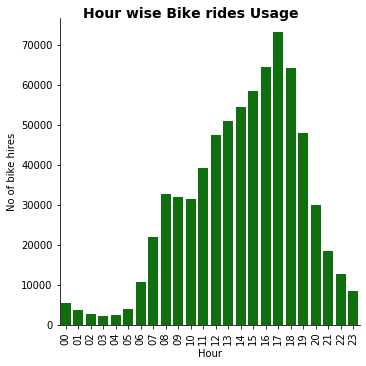

In [47]:
graph = sb.catplot(data=ford_df.query('month_year > "2020-02"'), x='hour', kind='count', color='green')
graph.set_axis_labels("Hour", "No of bike hires")
graph.fig.suptitle('Hour wise Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90)

### Observation :
- As seen above, the graph is now `Negatively Skewed` the peak ridership has completely shifted to the end of the business hour.

### Bivariate Visualisation:

#### 1. Proportion of the riders using either of `App` or `Clipper` method to hire the bike.
> Interested to see what is the proportion of the users are using the App to hire or Clipper to hire the bike,

(-1.1053190988570933,
 1.1079422678689235,
 -1.1068450278298874,
 1.1064163388961294)

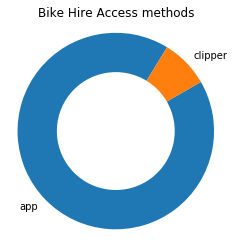

In [48]:
sorted_counts = ford_df['rental_access_method'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 30,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Bike Hire Access methods')
plt.axis('square')

### Observation:
- `App` is obviously the most popular access method to hire the bike,
- `92.1%` of people using the App and `7.9%` riders using the `Clipper`.

#### 2. How many riders are the Subscriber to the or how many are the Customer?
> Interested to find out the how many of the bike riders are the `Subscriber` and `Customer`.

(-1.1208589302319096,
 1.1139343595334912,
 -1.111062564998715,
 1.123730724766686)

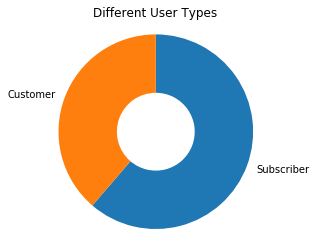

In [49]:
sorted_counts = ford_df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.6});
plt.title('Different User Types')
plt.axis('square')

#### Observation
- 85% of Subscriber is a big number of riders
- 15% of the Non-Subscriber using the bike 

#### 3. Which user type rides the bike longer?
> Interested to find out what type of user rides the longest?

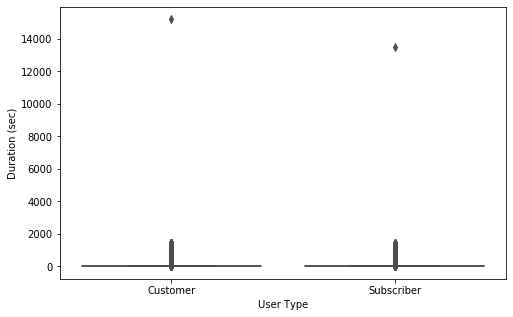

In [51]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = ford_df.query('duration_mins < 40000'), x = 'user_type', y = 'duration_mins', color = 'red')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()


- No observation from the above graph, need to reduce the `duration_mins` value further down.

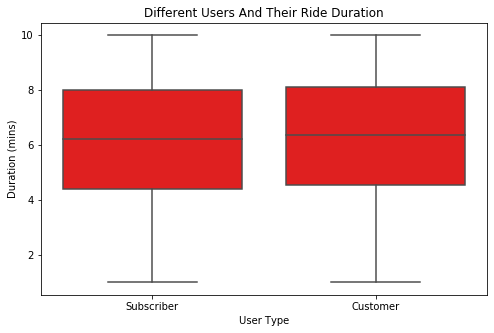

In [52]:
# Lowering the time duration_mins, with upper limit being 10 mins 
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = ford_df.query('duration_mins < 10'), x = 'user_type', y = 'duration_mins', color = 'red')
plt.title('Different Users And Their Ride Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.show()

- This looks better we know now `Customer` tends to hire bike for longer duration or rides for longer duration,
- `Subscriber` users hire bike more often and for shorter duration.

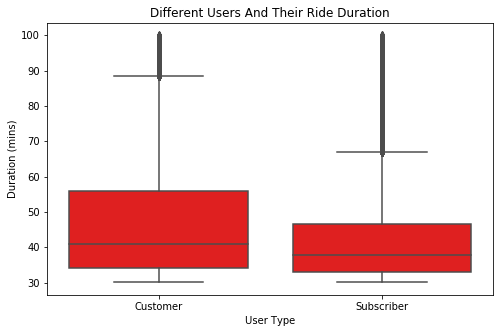

In [53]:
# Lets figure out what is the trend of the user type when the ride duration is between the 10 mins to 100 mins. 
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = ford_df.query('duration_mins > 30 and duration_mins < 100'), x = 'user_type', y = 'duration_mins', color = 'red')
plt.title('Different Users And Their Ride Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.show()

### Observation
- The median for the time spent on the ride by the Customer is more than the median time spent by the Subscriber of the App.
- Which infers the user type `Customer` tends to hire bike for longer duration or rides for longer duration


### Multi-Variate Visualisation
- In this section, I will explore than two variable in one visualisation,
- Columns I will would like to put together:
    ```
        rental_access_method
        rideable_type
        user_type
        year                            
        month                        
        day                        
        month_year     
        hour                         
        day_of_week 
    ```
    

In [54]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444694 entries, 0 to 2444693
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_mins            float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   end_station_id           float64       
 5   bike_id                  float64       
 6   user_type                object        
 7   bike_share_for_all_trip  object        
 8   ride_id                  object        
 9   rideable_type            object        
 10  rental_access_method     object        
 11  year                     object        
 12  month                    object        
 13  day                      object        
 14  month_year               object        
 15  hour                     object        
 16  day_of_week              object        
dtypes: datetime64[ns](2), float

In [55]:
# Revisit the values and their count in `rideable_type`
ford_df.rideable_type.value_counts()

electric_bike    367168
docked_bike      168477
Name: rideable_type, dtype: int64

In [56]:
# Revisit the values and their count in `user_type`
ford_df.user_type.value_counts()

Subscriber    1498557
Customer       946137
Name: user_type, dtype: int64

In [57]:
# Revisit the values and their count in `rental_access_method`
ford_df.rental_access_method.value_counts()

app        595649
clipper     51300
Name: rental_access_method, dtype: int64

In [58]:
# set user_type, rideable_type, bike_share_for_all_trip and rental_access_method column values to category
ford_df.user_type = ford_df.user_type.astype('category')
ford_df.rideable_type = ford_df.rideable_type.astype('category')
ford_df.bike_share_for_all_trip = ford_df.bike_share_for_all_trip.astype('category')
ford_df.rental_access_method = ford_df.rental_access_method.astype('category')

In [59]:
# verify the Dtype is type category for the above columns in the dataframe.
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444694 entries, 0 to 2444693
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_mins            float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   end_station_id           float64       
 5   bike_id                  float64       
 6   user_type                category      
 7   bike_share_for_all_trip  category      
 8   ride_id                  object        
 9   rideable_type            category      
 10  rental_access_method     category      
 11  year                     object        
 12  month                    object        
 13  day                      object        
 14  month_year               object        
 15  hour                     object        
 16  day_of_week              object        
dtypes: category(4), datetime64[

#### 1. What is the trend of the users and their ridership for each month of the year?
> I am interested to see if there is a popular month for each user type when they hire the most. 

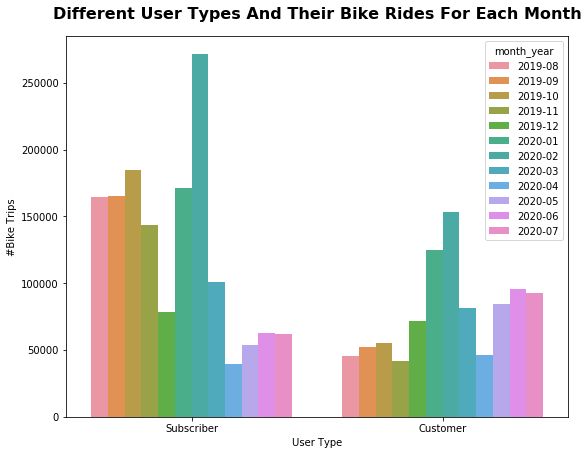

In [72]:
plt.figure(figsize = [9, 7])

graph = sb.countplot(data=ford_df.sort_values(by='month_year'), x="user_type", hue="month_year", order=ford_df.user_type.value_counts().index)
graph.set_xlabel('User Type')
graph.set_ylabel('#Bike Trips')
graph.set_title('Different User Types And Their Bike Rides For Each Month', y=1.03, fontsize=16, fontweight='semibold');

### Observation
- Nothing is particular, the summer time or the mid months seems to be popular for both the users. 

#### 2. What kind of bike is preferred by what kind of the user?
> Interested to find do the any one of the user has the preference of choosing the bike over the other.

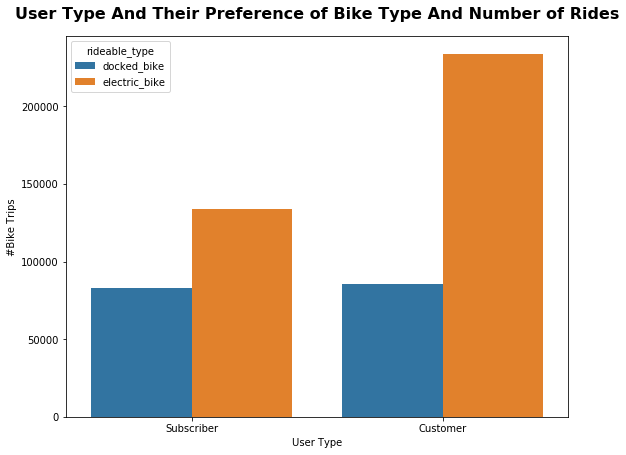

In [61]:
plt.figure(figsize = [9, 7])
graph = sb.countplot(data=ford_df, x="user_type", hue="rideable_type", order=ford_df.user_type.value_counts().index)
graph.set_xlabel('User Type')
graph.set_ylabel('#Bike Trips')
graph.set_title('User Type And Their Preference of Bike Type And Number of Rides', y=1.03, fontsize=16, fontweight='semibold');

### Observation
- Easy to read the `Customer` type user prefers to ride the `Electric` bike the most.

#### 3. What is the preferred bike accessing method for each user, find out by the number of rides taken?
> Interested to find do the any one of the user has the preference of choosing the bike over the other.

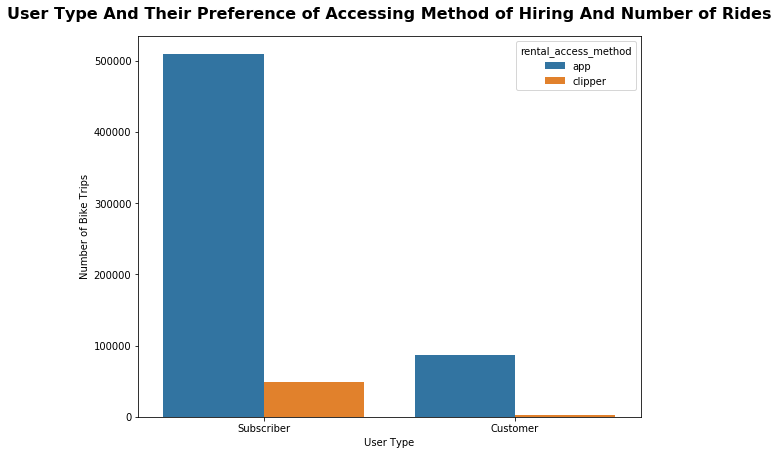

In [62]:
plt.figure(figsize = [9, 7])

graph = sb.countplot(data=ford_df, x="user_type", hue="rental_access_method", order=ford_df.user_type.value_counts().index)
graph.set_xlabel('User Type')
graph.set_ylabel('Number of Bike Trips')
graph.set_title('User Type And Their Preference of Accessing Method of Hiring And Number of Rides', y=1.03, fontsize=16, fontweight='semibold');

### Observations
- From the above table it looks like we have `app` being the most popular option among the user types. 
- But we are not very clear on the proportion wise which customer prefer which option when user type compared to each other?
- My question being do user_type `Customer` prefer using `Clipper` over the `Subscribers`? or Vice-Versa?


In [63]:
# lets make the two sub dataframe one contains the rows with user_type being Customer and other with Subscriber.
subs_df = ford_df.query('user_type == "Subscriber"')
cust_df = ford_df.query('user_type == "Customer"')

In [64]:

# find out the number of Subscribers using the App and Clipper and put them in two different variables.
subs_rider_using_app = subs_df.query('rental_access_method == "app"').rental_access_method.count()
subs_rider_using_clipper = subs_df.query('rental_access_method == "clipper"').rental_access_method.count()

# Add above two and find the proportion of the Subscriber using the clipper and App.
total_subs_rider = subs_rider_using_app + subs_rider_using_clipper
subs_rider_using_app_prop = subs_rider_using_app / total_subs_rider
subs_rider_using_clipper_prop = subs_rider_using_clipper / total_subs_rider

# find out the number of `Customer` type riders using the App and Clipper and put them in two different variables.
cust_rider_using_app = cust_df.query('rental_access_method == "app"').rental_access_method.count()
cust_rider_using_clipper = cust_df.query('rental_access_method == "clipper"').rental_access_method.count()

# Add above two and find the proportion of the Customer using the clipper and App.
total_cust_rider = cust_rider_using_app + cust_rider_using_clipper
cust_rider_using_app_prop = cust_rider_using_app / total_cust_rider
cust_rider_using_clipper_prop = cust_rider_using_clipper / total_cust_rider

# Putting all the variables and their Values into a dictionary,
proportion_data = {'user_type': ['Subscriber', 'Customer'], 
                   'Clipper': [subs_rider_using_clipper_prop, cust_rider_using_clipper_prop],
                   'App': [subs_rider_using_app_prop, cust_rider_using_app_prop]
                  }

# Creating a dataframe of the proportion values gathered from above.
proportion_df = pd.DataFrame.from_dict(proportion_data)
proportion_df

,user_type,Clipper,App
0,Subscriber,0.087860,0.912140
1,Customer,0.025566,0.974434


<Figure size 288x216 with 0 Axes>

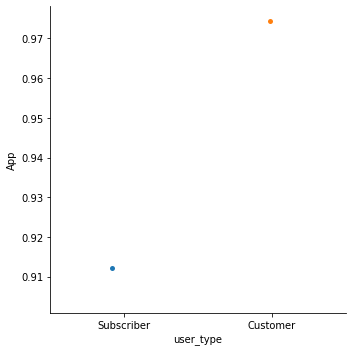

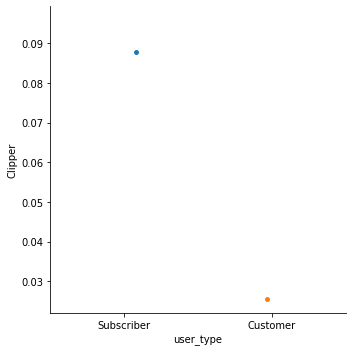

In [71]:
# Plotting the above dataframe with the proportion values.
plt.figure(figsize = [4, 3])

graph = sb.catplot(data=proportion_df, x="user_type", y="App")
graph = sb.catplot(data=proportion_df, x="user_type", y="Clipper")

### Observation
- As seen in the above two graphs, we know the answer to our question
- `Customer` type users are more likely to use the `App` than the `Subscribers`.

#### 4. Is there a trend in the different user type riding on different date of the months?


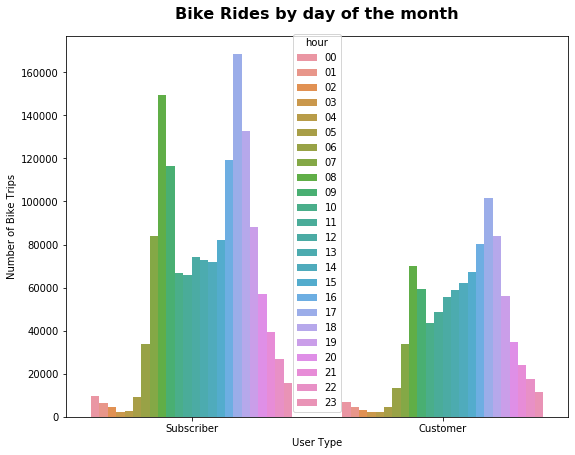

In [66]:
plt.figure(figsize = [9, 7])

graph = sb.countplot(data=ford_df, x="user_type", hue="hour", order=ford_df.user_type.value_counts().index)
graph.set_xlabel('User Type')
graph.set_ylabel('Number of Bike Trips')
graph.set_title('Bike Rides by day of the month', y=1.03, fontsize=16, fontweight='semibold');

### Observation
- Nothing interesting that differentiate between the two types of `riders` that I see in the above graph, 
- But it does show some similarities, both the riders are active in the `first and last 10 days` of the month.

#### 5. Is there a trend in the different user type riding on different date of the months?

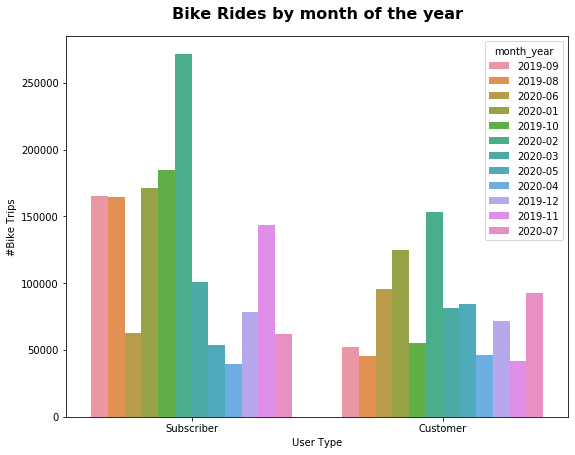

In [67]:
plt.figure(figsize = [9, 7])
graph = sb.countplot(data=ford_df, x="user_type", hue="month_year", order=ford_df.user_type.value_counts().index)
graph.set_xlabel('User Type')
graph.set_ylabel('#Bike Trips')
graph.set_title('Bike Rides by month of the year', y=1.03, fontsize=16, fontweight='semibold');

### Observation
- Nothing interesting that differentiate between the two types of `riders` that I see in the above graph, 
- But it does show some similarities, both the riders are active in the `mid month of the year`.